In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_decentralized_gaussian import *
from collections import OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Evaluation of Decentralized Thompson Sampling for different network topologies

#### Experiment Names:

Experiment number 1: 3 arms with Gaussian mean [0.1, 0.2, 0.5] and sigma 1.

Experiment number 2: 17 arms with Gaussian mean [0.5, 0.1, ...., 0.1] and sigma 1.

##### Network Topologies considered:

cycle (3 regular graph with self loops)

5 regular graph with self loops

grid

complete


In [11]:
# Parameters for run-time
max_iter = 800
runs = 2000

# Parameters for underlying MAB model
exp_num = 2
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
theta = np.array([0.5] + [0.1] * 16) # experiment 2
#theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)
sigma = 1

# Parameters for Thompson Sampling
mean_vec = np.zeros(num_arms)
sigma_vec = np.ones(num_arms)

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [12]:
N = 36
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N36'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N36'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


In [13]:
N = 64
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N64'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


In [14]:
N = 81
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N81'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N81'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


In [15]:
N = 100
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N100'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N100'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


In [16]:
N = 144
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N144'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N144'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


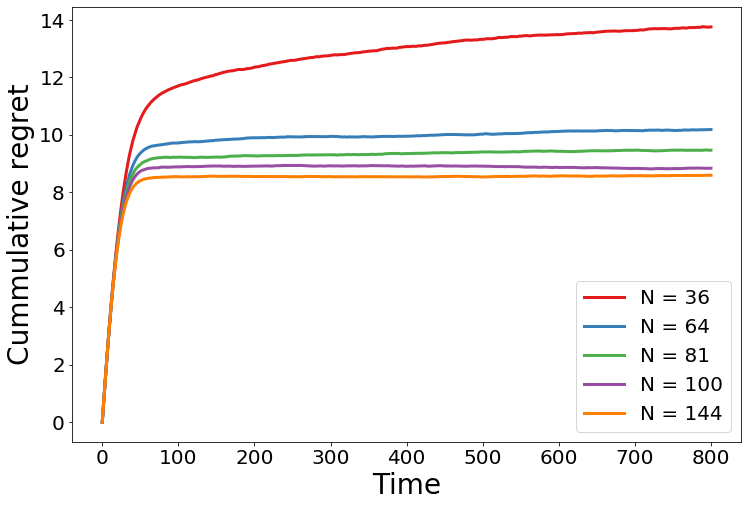

In [17]:
plt.figure(figsize=(12,8))

N36_plot, = plt.plot(avg_cumm_regret['ts_N36'], color='#e41a1c', label = r"N = 36", linewidth=3)
N64_plot, = plt.plot(avg_cumm_regret['ts_N64'], color='#377eb8', label = r"N = 64", linewidth=3)
N81_plot, = plt.plot(avg_cumm_regret['ts_N81'], color='#4daf4a', label = r"N = 81", linewidth=3)
N100_plot, = plt.plot(avg_cumm_regret['ts_N100'], color='#984ea3', label = r"N = 100", linewidth=3)
N144_plot, = plt.plot(avg_cumm_regret['ts_N144'], color='#ff7f00', label = r"N = 144", linewidth=3)

plt.xlabel("Time", fontsize = 28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r"Cummulative regret", fontsize = 28)
plt.legend(handles=[N36_plot, N64_plot, N81_plot, N100_plot, N144_plot], loc='lower right', fontsize = 20)
filename = 'results_N36To144_T{}_TypeW_{}_NetworkSize_GaussianExp{}.pdf'.format(max_iter, 'cycle', exp_num)
plt.savefig(filename, bbox_inches='tight')
plt.show()